In [162]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
intc = pd.read_csv('INTC.csv')

In [56]:
intc['Date'] = pd.to_datetime(intc['Date'])

In [57]:
intc.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [58]:
intc.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.00000,3.019000e+03
mean,25.396744,25.659096,25.142136,25.40789,4.919834e+07
std,6.715544,6.728572,6.700110,6.72870,2.817910e+07
min,12.170000,12.630000,12.050000,12.08000,5.893789e+06
25%,20.645000,20.880000,20.415000,20.66000,2.736445e+07
50%,23.600000,23.860000,23.320000,23.58000,4.519099e+07
75%,30.810000,31.105000,30.500000,30.85500,6.363350e+07
max,47.540000,47.640000,46.660000,47.56000,3.100734e+08


In [106]:
intc.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Name              object
dtype: object

In [109]:
intc_vals = intc.drop('Date', axis = 1)
intc_targs = intc_vals['Close'].shift(-30)


In [193]:
X_vals = intc.set_index('Date').groupby(pd.Grouper(freq = 'W')).mean()

In [194]:
X_vals

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-08,25.8000,26.1700,25.6525,26.0150,5.079881e+07
2006-01-15,26.1640,26.3900,25.8640,26.0980,4.796799e+07
2006-01-22,23.4250,23.5375,22.9550,23.0700,1.807510e+08
2006-01-29,21.6000,21.7180,21.2520,21.4000,1.099840e+08
2006-02-05,21.4920,21.6160,21.1960,21.2800,8.007360e+07
2006-02-12,20.8080,21.0440,20.6180,20.8480,8.092920e+07
2006-02-19,21.2140,21.3740,21.0300,21.1620,7.617675e+07
2006-02-26,20.3625,20.5525,20.1025,20.3550,9.106545e+07
2006-03-05,20.4800,20.8240,20.3680,20.5460,1.100575e+08


In [176]:
dates = X_vals.index

In [207]:
y_vals = X_vals['Close'].shift(-8)

In [208]:
y_vals

Date
2006-01-08    20.5460
2006-01-15    19.9940
2006-01-22    19.7200
2006-01-29    19.7360
2006-02-05    19.6620
2006-02-12    19.3500
2006-02-19    19.2725
2006-02-26    19.3300
2006-03-05    19.5220
2006-03-12    19.4180
2006-03-19    19.5980
2006-03-26    18.8100
2006-04-02    18.0240
2006-04-09    18.0250
2006-04-16    17.4860
2006-04-23    17.6260
2006-04-30    18.2080
2006-05-07    18.6620
2006-05-14    18.8800
2006-05-21    18.0660
2006-05-28    17.7580
2006-06-04    17.6340
2006-06-11    17.6140
2006-06-18    17.4480
2006-06-25    18.3140
2006-07-02    18.4860
2006-07-09    19.6700
2006-07-16    19.4925
2006-07-23    19.6540
2006-07-30    19.3640
               ...   
2017-06-11    36.2500
2017-06-18    36.2880
2017-06-25    35.6660
2017-07-02    34.7220
2017-07-09    34.8860
2017-07-16    35.3775
2017-07-23    36.3340
2017-07-30    37.1360
2017-08-06    37.6160
2017-08-13    39.3840
2017-08-20    39.5340
2017-08-27    40.0640
2017-09-03    41.6620
2017-09-10    46.0020
2017-

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X_vals.values[8:,:], y_vals.values[:-8])

In [210]:
sc = StandardScaler()
sc.fit_transform(X_train, y_train)

array([[-0.77235904, -0.7811898 , -0.76739774, -0.76757863,  0.33885891],
       [ 0.86285066,  0.86584257,  0.88843216,  0.88109886, -1.34374137],
       [ 1.00328526,  0.99150172,  0.99280253,  0.98339344, -1.27500057],
       ..., 
       [-0.3717162 , -0.38027729, -0.35651439, -0.3661771 , -0.90563201],
       [ 1.19612084,  1.18776934,  1.15955519,  1.15777279, -0.65090692],
       [-0.62743293, -0.64416149, -0.60844286, -0.62520372,  0.09127553]])

In [211]:
sc.transform(X_test, y_test)

array([[-0.60856858, -0.62770613, -0.58864848, -0.60366802,  0.61222476],
       [-0.2726035 , -0.26120029, -0.28393499, -0.29199858,  0.32553809],
       [-0.08875096, -0.11758984, -0.0841917 , -0.10176656, -1.08548016],
       [-0.63162501, -0.6387761 , -0.63063656, -0.64943138, -0.01837073],
       [-0.68192994, -0.70010973, -0.69061953, -0.70925277,  2.25782154],
       [ 1.23325067,  1.23055329,  1.20364267,  1.2313531 , -0.57097674],
       [-0.7570879 , -0.76952145, -0.74790327, -0.7663822 ,  0.90410533],
       [ 1.42548737,  1.41964038,  1.42947856,  1.43325029, -1.29391645],
       [-0.09234417, -0.08378154, -0.07879323, -0.06736926,  1.24891446],
       [-0.84542097, -0.86765526, -0.85257355, -0.86957409,  1.75019829],
       [ 1.436267  ,  1.42382902,  1.43577677,  1.41560298, -1.23384119],
       [ 3.19154979,  3.24169799,  3.15548853,  3.23148125, -0.29226341],
       [-0.81547756, -0.81978511, -0.82018275, -0.82889555,  0.18335881],
       [-0.46663681, -0.46584518, -0.4

8.24831627977e-13
0.0993225180927


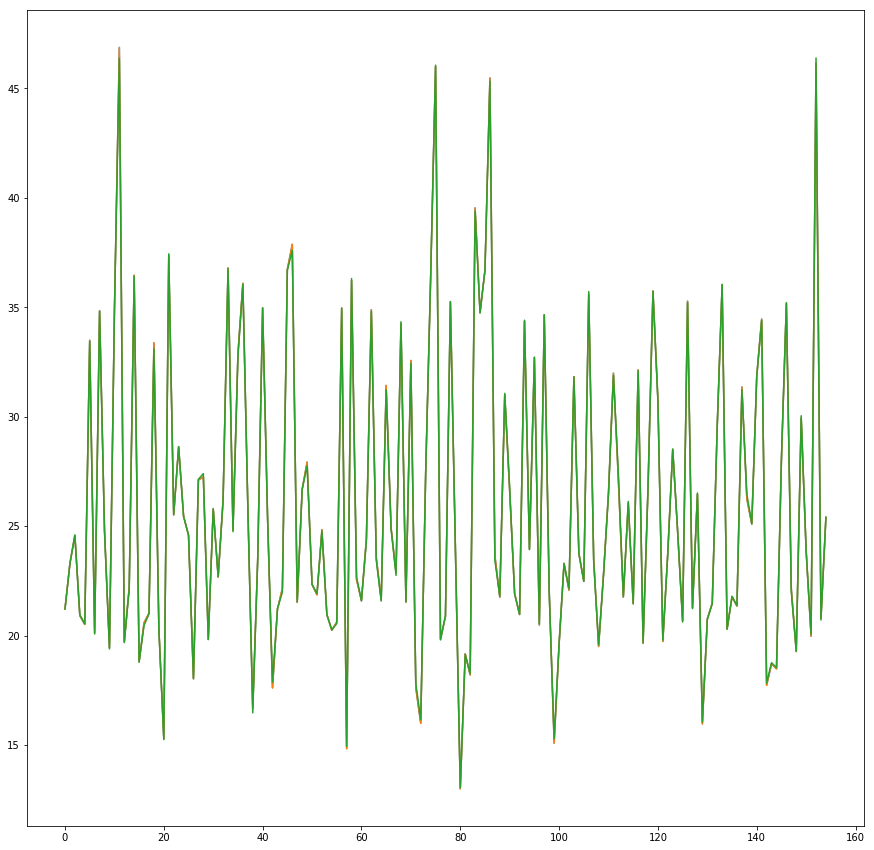

In [212]:
models = [LinearRegression(), GradientBoostingRegressor()]
fig, ax = plt.subplots(figsize = (15, 15))
x = range(len(X_test))
ax.plot(x, y_test)

for m in models:
    mod = m.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)**.5
    print(rmse)
    ax.plot(x, y_pred)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [237]:
#Import data
intc = pd.read_csv('INTC.csv')

#Extract target
close = intc['Close'].values

#Separate train/test
train, test = close[:2500], close[2500:]

#Train model
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
#Calculate root mean squared error
error = (mean_squared_error(test, predictions))**.5

Lag: 27
Coefficients: [ 0.05390998  0.96109354  0.01952693  0.07312047 -0.09622273  0.03349089
 -0.01511348  0.00944726  0.00630173 -0.01068585  0.06527959 -0.04544458
  0.02497172 -0.02302062  0.01140907 -0.08865074  0.07585031  0.0098767
 -0.01522622  0.02059847  0.01171024 -0.02087013  0.03076454 -0.05473674
 -0.00107802 -0.00181329  0.01369137  0.0036626 ]


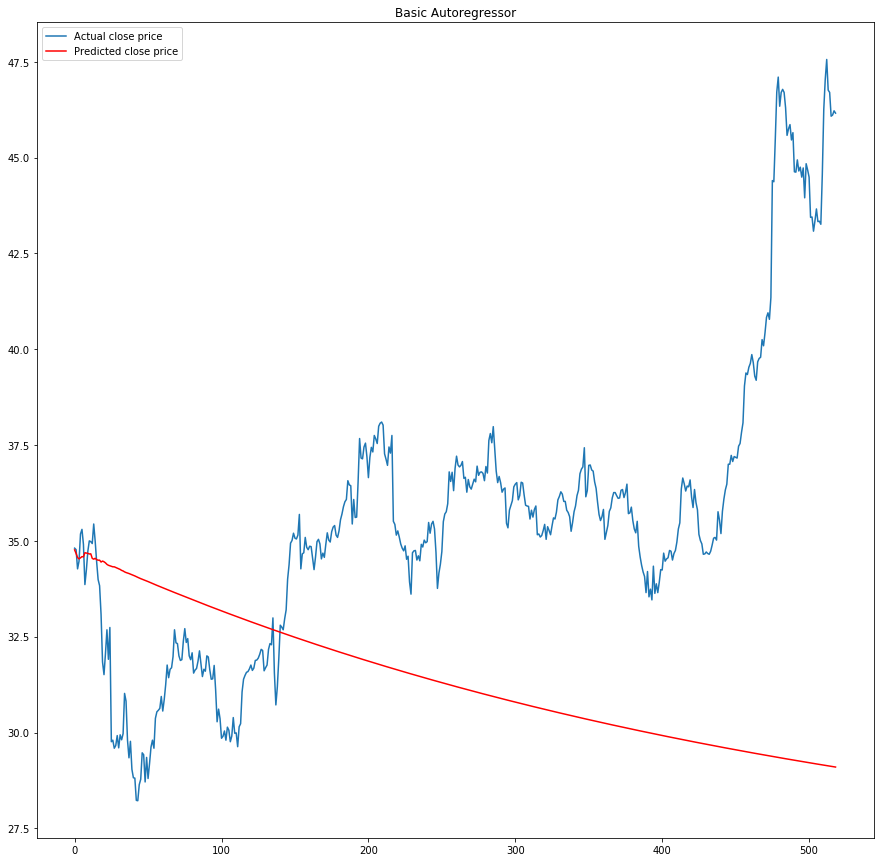

In [238]:
fig, ax = plt.subplots(figsize = (15,15))
ax.plot(test, label = "Actual close price")
ax.plot(predictions, color='red', label = "Predicted close price")
plt.title('Basic Autoregressor')
plt.legend()
plt.show()